<a href="https://colab.research.google.com/github/berkayopak/MassProbabilityFunction/blob/master/The_Probability_Mass_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Probability Mass Function (PMF)

## Introduction
The class size paradox describes the apparent contradictory findings where a total allocation of resources is fixed. Differences result in the perception of events based on whether we consider events from the point of view of the typical event or the typical person participating in an event. Such varying distributions can have important consequences for data analysis. pmfs can help resolve some of these situations as we shall see below

## The Problem

At an educational establishment, the expected student-to-teacher ratio is 10:1. But randomly interviewed students often feel that their average class size is much bigger than 10. There are two main reasons for such observations:

    Students typically engage into 4 – 5 classes at any given time, but teachers only teach 1 or 2 classes.
    An obvious fact, that number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students, we would surely come across more students from larger classes.

Let's work through a set of data to re-create and analyze this paradox.

Suppose that a college offers 65 classes in a term. We can start with a following distribution of sizes and counts:

```
 size      count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2

```

If the campus manager is inquired about the average average class size, he would perform the following tasks:

    Construct a pmf from given data
    Compute the mean from calculated pmf

So let's follow the management approach first and see what mean we get from our pmf. Here is a size_and_count dictionary to get you started. Calculate the pmf from this data as we have seen before. For keys, we have used the average for each class size i.e. for size 5 - 9, we use 7 as an average.



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = {'Class_size': [7, 12, 17, 22, 27, 32, 37, 42, 47],
       'Count': [8, 8, 14, 4, 6, 12, 8, 3, 2]}
df = pd.DataFrame(data)
df

,Class_size,Count
0,7,8
1,12,8
2,17,14
3,22,4
4,27,6
5,32,12
6,37,8
7,42,3
8,47,2


Following the approach seen in the previous lesson, calculate the pmf by normalizing each size.

In [31]:
df["pmf"] = df["Count"] / df["Count"].sum()
df

,Class_size,Count,pmf
0,7,8,0.123077
1,12,8,0.123077
2,17,14,0.215385
3,22,4,0.061538
4,27,6,0.092308
5,32,12,0.184615
6,37,8,0.123077
7,42,3,0.046154
8,47,2,0.030769



## Calculate Mean / Expected Value (E)

We can now calculate the average of Expected value for this distribution.

    The mean μ ( or expected value E,E [X] ) of a random variable X is the sum of the weighted possible values for X; weighted, that is, by their respective probabilities. If S is the set of all possible values for X, then the formula for the mean is:

μ = ∑ x ∈ S x ⋅ p (x)

In simple terms, we must multiply each element in the sizes list to their probability of occurrence. Let's do this way: 


In [32]:
weighted_values = (df["Count"]*df["Class_size"])
actual_mean = weighted_values.sum()/ df["Count"].sum()
actual_mean

23.692307692307693

So the campus manager's answer would be 23.7 , as the average class size. And this makes a lot of sense too looking at our calculation above. We can plot a pmf function based on above findings for inspections.

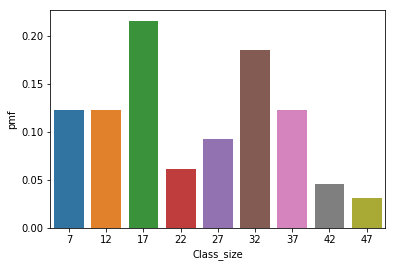

In [33]:
sns.barplot(df["Class_size"], df["pmf"])


## Random Student Survey

Now if we survey a random group of students about size of their classes, and compute the mean, according to the paradox, we would observe that the average class is much bigger than 23.7. Howcome !!! Let's see this in action below:

First, let's compute a distribution as a likely observation by students, where the probability associated with each class size is “biased” by the number of students in the class. Perform following tasks to introduce this biasness.

   * For each class size x, multiply the class probability by x, the number of students who observe that class size.
   * Get the sum for biased class size sum The result is a new Pmf that represents the biased distribution.


This is great so far, we can now normalize the new biased list with the sum of its values, just like we did before.

   * Normalize the biased list and calculate the new pmf




In [80]:
biased_data = {'Class_size': [7, 12, 17, 22, 27, 32, 37, 42, 47],
              'bias' : [0.861, 1.476, 3.655, 1.3639999999999999, 2.484, 5.92, 4.551, 1.932, 1.457]}
biased_df = pd.DataFrame(biased_data)
biased_df['pmf'] = biased_df['bias'] / biased_df['bias'].sum()
biased_df

,Class_size,bias,pmf
0,7,0.861,0.036329
1,12,1.476,0.062278
2,17,3.655,0.154219
3,22,1.364,0.057553
4,27,2.484,0.104810
5,32,5.920,0.249789
6,37,4.551,0.192025
7,42,1.932,0.081519
8,47,1.457,0.061477


Right so we can see that probabilities values in this pmf are different than our original pmf. So just like before, we can calulcate the MU, average or expected value.

In [87]:
weighted_b_values = (biased_df["bias"]*biased_df["Class_size"])
biased_mean = weighted_b_values.sum()/ biased_df["bias"].sum()
biased_mean

29.130801687763714



the biased mean is much higher than our actual mean
Here comes the paradox

Here we see it, the average or expected value of biased results become much higher than the average of actual values. In some situations, such a paradox could be mind boggling. As an extra measure , we can inspect both pmfs side by side in a visual manner to see the differences.

    Plot a figure with two axes
    Show pmf1 and pmf2 side by side.



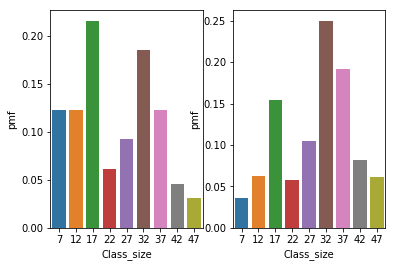

In [88]:
fig, ax =plt.subplots(1,2)
sns.barplot(df["Class_size"], df["pmf"], ax=ax[0])
sns.barplot(biased_df["Class_size"], biased_df["pmf"], ax=ax[1])



So our results tell us that in the biased distribution there are fewer small classes and more large classes.

The mean of the biased distribution is 29.1, almost 25% higher than the actual mean.

To to an even more direct comparison, plot these pmfs on top of each other and change the marker style for differentiation.


<p><span><b>Red = Actual Data</b></span></p>
<p><span><b>Blue = Observed Data</b></span></p>


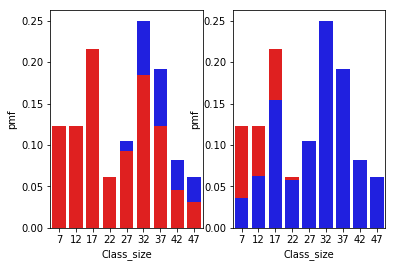

In [97]:

fig, ax =plt.subplots(1,2)

sns.barplot(biased_df["Class_size"], biased_df["pmf"], ax=ax[0], color ='b')
sns.barplot(df["Class_size"], df["pmf"], ax=ax[0], color ='r')

sns.barplot(df["Class_size"], df["pmf"], ax=ax[1], color ='r')
sns.barplot(biased_df["Class_size"], biased_df["pmf"], ax=ax[1], color ='b')



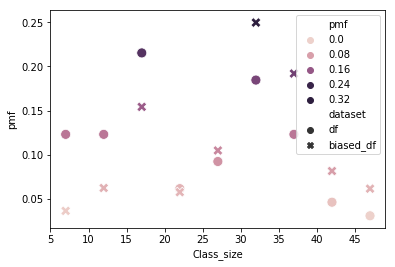

In [76]:
concatenated = pd.concat([df.assign(dataset='df'), biased_df.assign(dataset='biased_df')], sort=False)
sns.scatterplot(x='Class_size', y='pmf', data=concatenated,
                hue='pmf', style='dataset', s=100)



Here is the key, We can see for smaller class sizes, the probability of coming across a students is lower than actual probability. Also, in the larger classes, the the probability of coming across a student is much higher than actual probability. And hence this appears to an observer as a Paradox. But its not a paradox for us anymore .. We have nailed it.